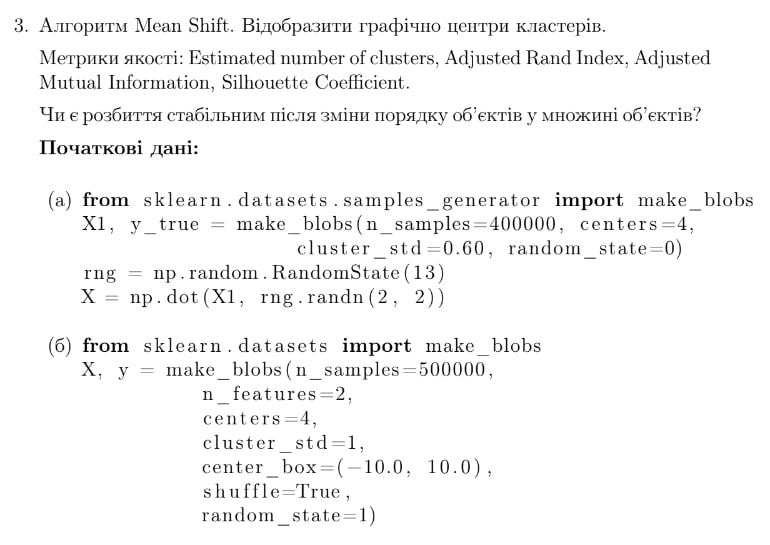

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 8)})

In [2]:
def scoring(clusterization, y_true, X):
    print(f'Number of clusters: {len(np.unique(y_true))} Estimated number of clusters: {len(np.unique(clusterization.labels_))}')
    print(f'Adjusted rand score: {metrics.adjusted_rand_score(y_true, clusterization.labels_)}')
    print(f'Adjusted mutual information: {metrics.adjusted_mutual_info_score(y_true, clusterization.labels_)}')
    print(f'Silhouette coefficient: {metrics.silhouette_score(X, clusterization.labels_)}')

Завдання було змінено (з n_samples=400000 на n_samples=40000), адже з такими початковими умовами алгоритм не закінчував свою роботу навіть через декілька годин (n_jobs=-1)

In [96]:
from sklearn.datasets._samples_generator import make_blobs

X1, y_true = make_blobs(n_samples=40000, centers=4, cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

<AxesSubplot:>

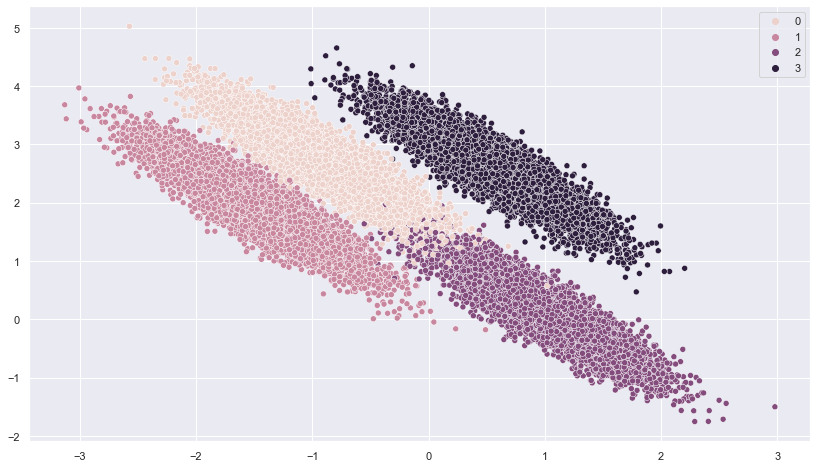

In [97]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_true)

In [98]:
from sklearn.cluster import MeanShift

clustering = MeanShift(n_jobs=-1)

In [99]:
%%time
clustering.fit(X)

Wall time: 7min


MeanShift(n_jobs=-1)

Про час було сказано вище, якщо збільшити кількість точок, то алгоритм буде працювати декілька годин

<AxesSubplot:>

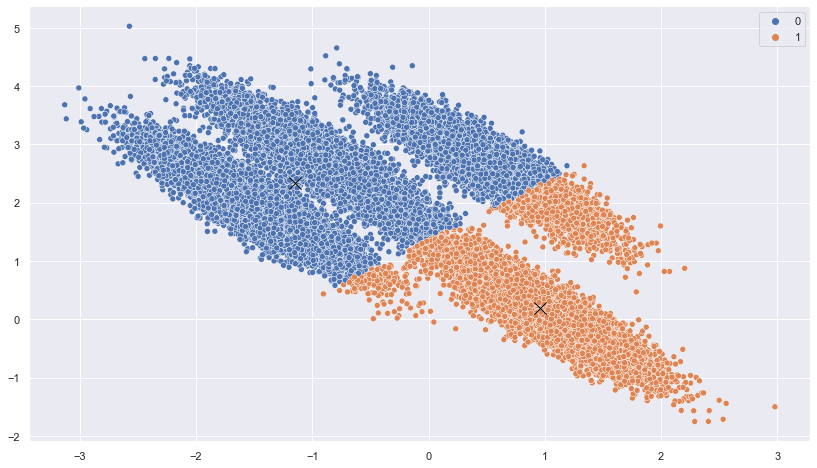

In [100]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [101]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 2
Adjusted rand score: 0.3022212645556311
Adjusted mutual information: 0.4401159440790222
Silhouette coefficient: 0.5292471362344603


Алгоритм неправильно розділив масив, отримали 2 кластери, а не 4 <br>
Значення метрик незадовільне

Спробуємо налаштувати параметр bandwidth:

In [102]:
from sklearn.cluster import estimate_bandwidth

estimate_bandwidth(X, n_jobs=-1)

1.3747788953195723

Отримали значення від якого можна відштовхуватися

bandwidth=0.5

In [103]:
clustering = MeanShift(bandwidth=0.5, n_jobs=-1)

In [104]:
%%time
clustering.fit(X)

Wall time: 5min 51s


MeanShift(bandwidth=0.5, n_jobs=-1)

<AxesSubplot:>

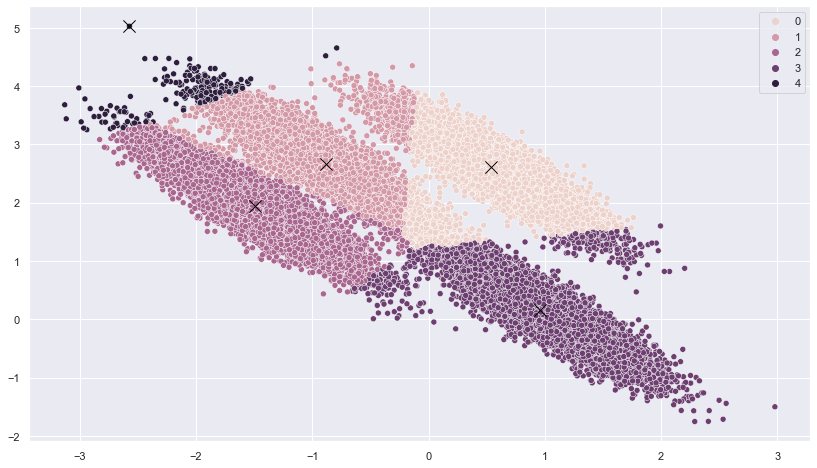

In [105]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [106]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 5
Adjusted rand score: 0.8815899392314495
Adjusted mutual information: 0.847784678159066
Silhouette coefficient: 0.4632952010889807


Порівнянно зі стандартним (вирахуваним) значенням bandwidth ми отримали значення метрик краще, кількість кластерів ближча до шуканої, але з малюнку ми бачимо, що самі кластери виглядають не так як потрібно, значення silhouette coefficient є доказом цього

bandwidth=0.75

In [107]:
clustering = MeanShift(bandwidth=0.75, n_jobs=-1)

In [108]:
%%time
clustering.fit(X)

Wall time: 3min 42s


MeanShift(bandwidth=0.75, n_jobs=-1)

<AxesSubplot:>

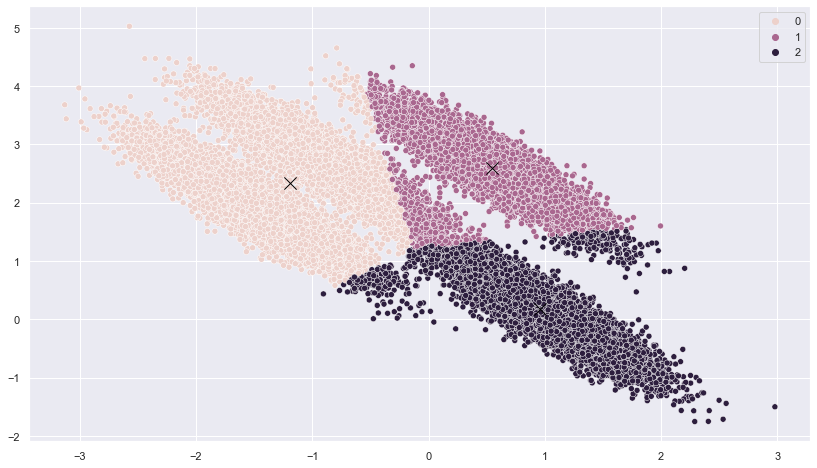

In [109]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [110]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 3
Adjusted rand score: 0.6593823891542816
Adjusted mutual information: 0.7422156105723668
Silhouette coefficient: 0.5277704566587427


Значення метрик гірше ніж у попердній кластеризації, з малюнку видно, що кластеризація йде не так як потрібно

bandwidth=1

In [111]:
clustering = MeanShift(bandwidth=1, n_jobs=-1)

In [112]:
%%time
clustering.fit(X)

Wall time: 6min 31s


MeanShift(bandwidth=1, n_jobs=-1)

<AxesSubplot:>

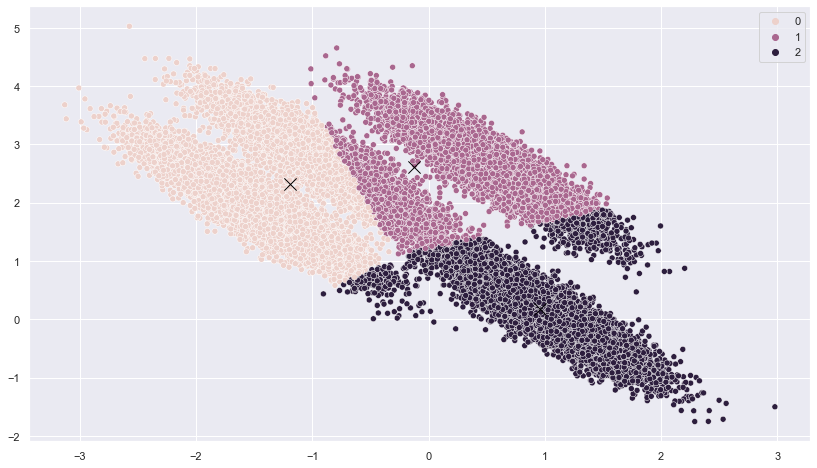

In [113]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [114]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 3
Adjusted rand score: 0.5998938444606818
Adjusted mutual information: 0.6720561570755426
Silhouette coefficient: 0.49674313756251903


Значення метрик гірше ніж у попердній кластеризації, з малюнку видно, що кластеризація йде не так як потрібно

bandwidth=1.5

In [115]:
clustering = MeanShift(bandwidth=1.5, n_jobs=-1)

In [116]:
%%time
clustering.fit(X)

Wall time: 4min 46s


MeanShift(bandwidth=1.5, n_jobs=-1)

<AxesSubplot:>

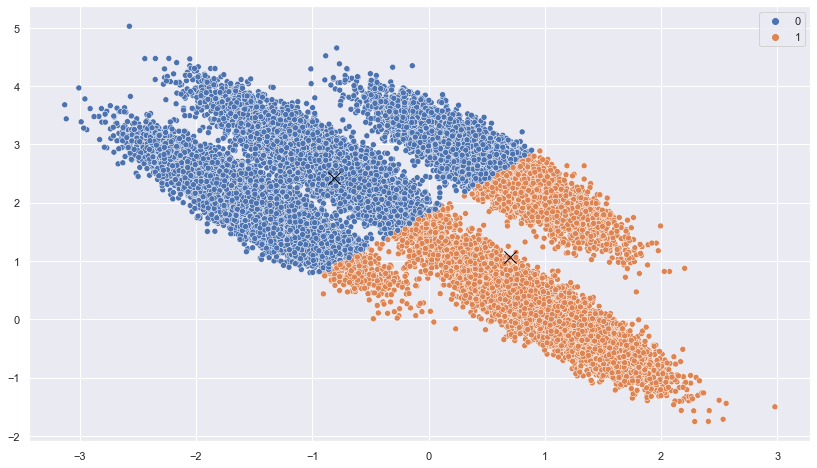

In [117]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [118]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 2
Adjusted rand score: 0.3032017695606543
Adjusted mutual information: 0.40581454489909996
Silhouette coefficient: 0.5002738643992496


Значення метрик гірше ніж у попердній кластеризації, з малюнку видно, що кластеризація йде не так як потрібно

Змінимо порядок об'єктів

In [119]:
from sklearn.utils import shuffle

X, y_true = shuffle(X, y_true)

In [120]:
clustering = MeanShift(n_jobs=-1)

In [121]:
%%time
clustering.fit(X)

Wall time: 4min 33s


MeanShift(n_jobs=-1)

<AxesSubplot:>

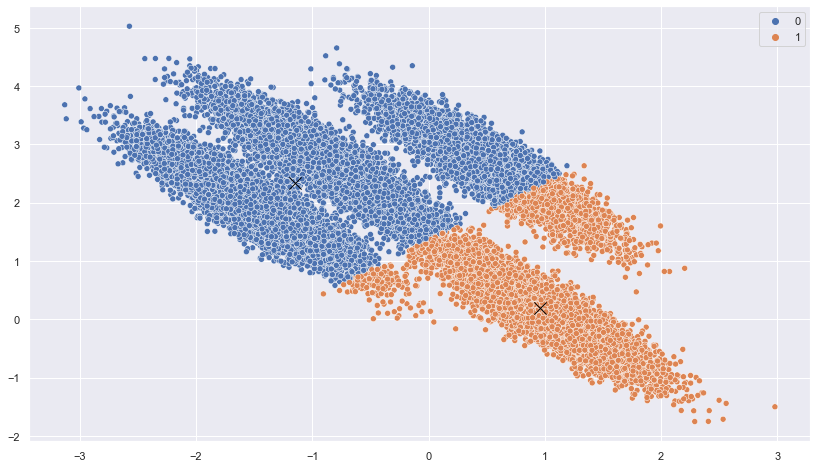

In [122]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [123]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 2
Adjusted rand score: 0.3022212645556311
Adjusted mutual information: 0.4401159440790222
Silhouette coefficient: 0.5292471362344602


In [124]:
clustering = MeanShift(bandwidth=0.5, n_jobs=-1)

In [125]:
%%time
clustering.fit(X)

Wall time: 19min 24s


MeanShift(bandwidth=0.5, n_jobs=-1)

<AxesSubplot:>

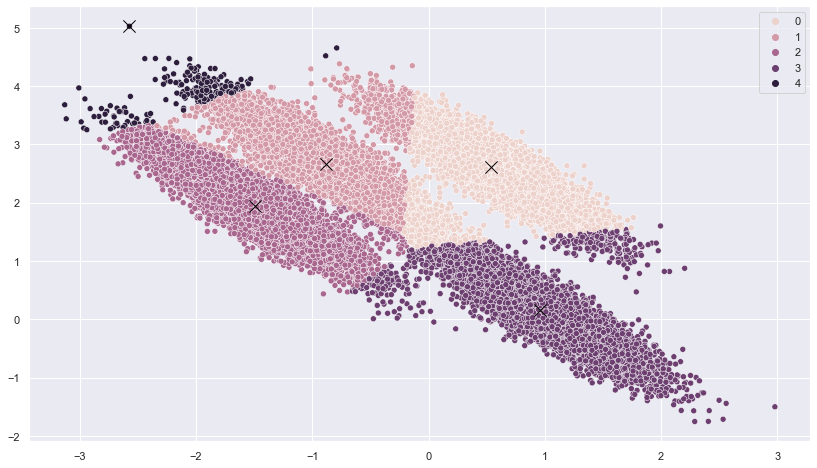

In [126]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [127]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 5
Adjusted rand score: 0.8815899392314495
Adjusted mutual information: 0.847784678159066
Silhouette coefficient: 0.46329520108898076


In [128]:
clustering = MeanShift(bandwidth=0.75, n_jobs=-1)

In [129]:
%%time
clustering.fit(X)

Wall time: 3min 40s


MeanShift(bandwidth=0.75, n_jobs=-1)

<AxesSubplot:>

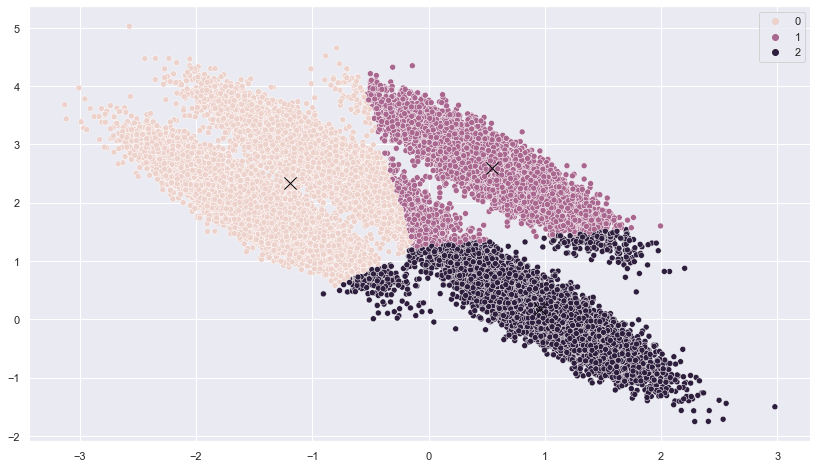

In [130]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [131]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 3
Adjusted rand score: 0.6593823891542816
Adjusted mutual information: 0.7422156105723668
Silhouette coefficient: 0.5277704566587427


In [132]:
clustering = MeanShift(bandwidth=1, n_jobs=-1)

In [133]:
%%time
clustering.fit(X)

Wall time: 6min 15s


MeanShift(bandwidth=1, n_jobs=-1)

<AxesSubplot:>

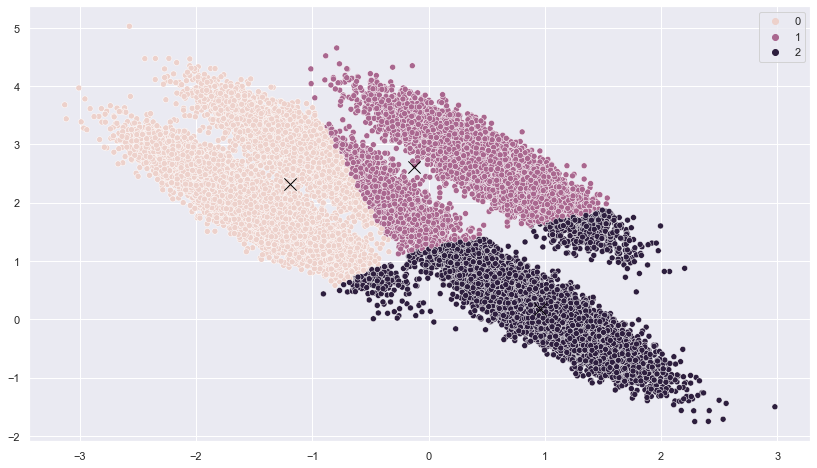

In [134]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [135]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 3
Adjusted rand score: 0.5998938444606818
Adjusted mutual information: 0.6720561570755426
Silhouette coefficient: 0.496743137562519


In [136]:
clustering = MeanShift(bandwidth=1.5, n_jobs=-1)

In [137]:
%%time
clustering.fit(X)

Wall time: 5min 10s


MeanShift(bandwidth=1.5, n_jobs=-1)

<AxesSubplot:>

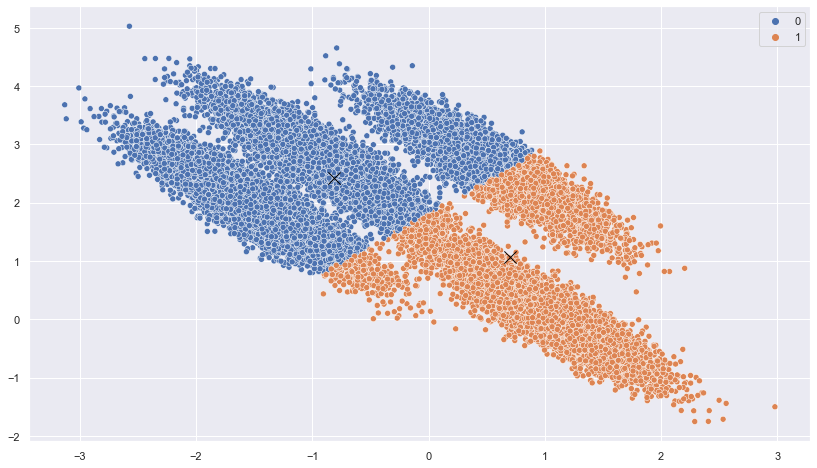

In [138]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)
sns.scatterplot(x=clustering.cluster_centers_[:, 0], y=clustering.cluster_centers_[:, 1], s=150, ec='black', marker='x')

In [139]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 2
Adjusted rand score: 0.3032017695606543
Adjusted mutual information: 0.40581454489909996
Silhouette coefficient: 0.5002738643992496


Зміна порядку об'єктів ніяк не вплинула на результати кластеризації з різними значенням bandwidth -> кластеризація стабільна

Результати незадовільні, спробуємо алгоритм DBSCAN, він повинен себе показати набагато краще на цьому наборі даних

In [3]:
from sklearn.datasets._samples_generator import make_blobs

X1, y_true = make_blobs(n_samples=40000, centers=4, cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X = np.dot(X1, rng.randn(2, 2))

In [106]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.2, min_samples=220, n_jobs=-1)

In [107]:
%%time
clustering.fit(X)

Wall time: 1.17 s


DBSCAN(eps=0.2, min_samples=220, n_jobs=-1)

<AxesSubplot:>

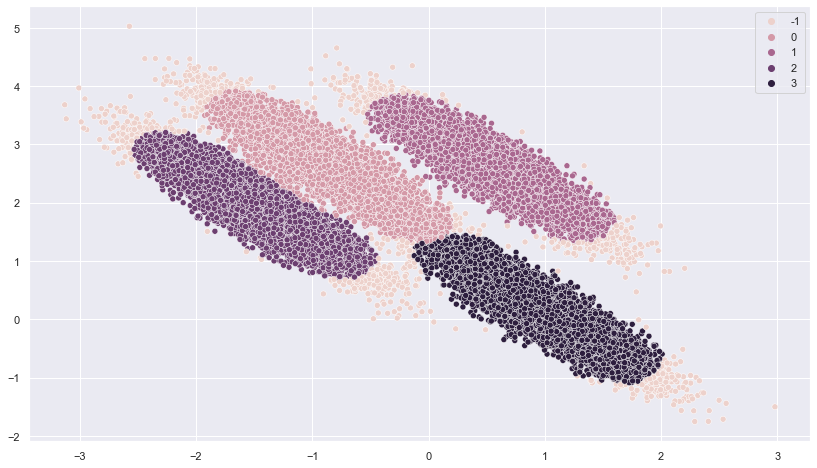

In [108]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_)

In [109]:
scoring(clustering, y_true, X)

Number of clusters: 4 Estimated number of clusters: 5
Adjusted rand score: 0.9533121035825033
Adjusted mutual information: 0.9273993065443683
Silhouette coefficient: 0.4666427156444779


Ми отримали правильну кількість кластерів (п'ятий це не визначений) завдяки налаштуванню параметрів цього алгоритму (це не було показано в лабораторній работі через велику кількість тестів, це показує нам мінус цього алгоритму, порівняно невелика зміна параметрів дає сильний ефект на результат кластеризації).
Значення метрик доволі високі, але "silhouette" порівнянно низький, що означає, ???що модель розташувала кластери близько один до одного??? (напишіть будь-ласка чи вірні мої судження)

Висновки: <br>
1. На цьому наборі даних MeanShift не показав себе з гарної сторони, навіть з налагодженням параметру bandwidth ми отримували розбиття на неправильні кластери і отримували погані значення метрик.
2. Якщо порівнювати по часу (наприклад з DBSCAN), то це дуже повільний алгоритм
